<img src="Images/logo.jpg" width="600">

## <center> <span style="color:darkred"> Exercitation_02</span> </center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

### <font color="blue"> Part 01
    
We have to calculate this integral $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1, $$ sampling a uniform distribution and with the importance sampling. 
In the first case I used a standard random sampling $10^5$ points and then using the *blocking method* to calculate the mean and the uncertainty (I used $100$ blocks).  
In the second I generated samples with a distribution $$p(x) = \frac{4}{3} \bigg( 1-\frac{x}{2} \bigg)$$ with the method of the inversion of the cumulative (see `Exercitation_01`) and then integrate the function $$g(x)= \frac{3 \pi}{8} \frac{\cos \big(\frac{\pi x}{2}\big)}{1-\frac{x}{2}}. $$
The results are shown below.

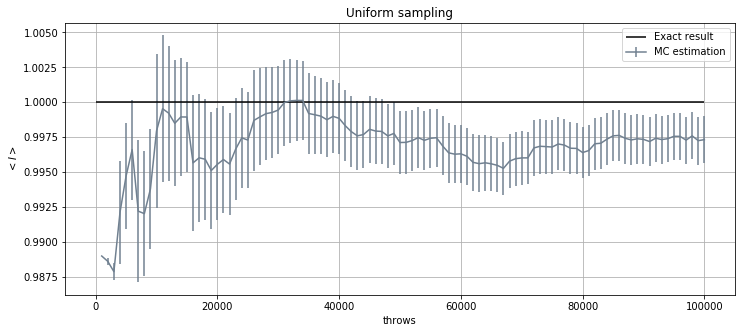

In [3]:
#plot of the integration with uniform distribution

data_u= ascii.read('P1/Risultati/int.uniform',format='no_header')   #loading data
x_u = data_u['col1']
I_u = data_u['col2']
err_u = data_u['col3']

plt.figure(figsize=(12,5))   #plotting data
plt.grid(True)
plt.errorbar(x_u, I_u, err_u, color = 'slategrey', label='MC estimation')
plt.hlines(1, 0, 1E5, label= 'Exact result')
plt.title('Uniform sampling')
plt.xlabel('throws')
plt.ylabel('$<I>$')
plt.legend()
plt.show()

The importance sampling implies an approximation in the function we use to sample and, as we saw in the theory lesson, the best result is when this one is similar to the integrand.  
In the following plot, I superimposed the integrand function, the polynomial I chose and an histogram with the data (following, obviously, this distribution).  
We can evaluate qualitatively the goodness of this approximation. 

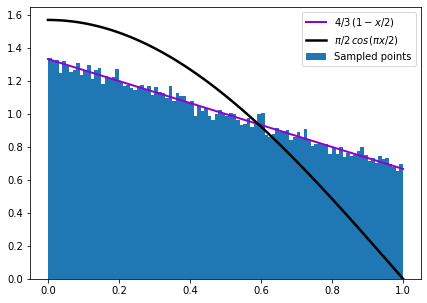

In [4]:
#Comparison between the sampled data, which correctly follow the distribution chosen (purple) and the 
#real integral (black line)

data3= ascii.read('P1/Risultati/sampled.points')   #loading data
punti = data3['sampled_points']

x = np.linspace(0., 1., 100)
y=4/3*(1-x/2)  #function I used to generate samples
c = np.pi/2. * np.cos(np.pi * x/2.)   # the 'real' function integrand

plt.figure(figsize=(7,5)) 
plt.hist(punti, density=True, bins=100, label='Sampled points')   #histogram of the sampled points
plt.plot(x,y, color='darkviolet', lw=2., label='$4/3 \, (1- x/2)$')
plt.plot (x,c, color = 'black' , lw=2.5, label='$ \pi/2 \, cos(\pi x/2)$')
plt.legend()
plt.show()

The code I used to sample with the chosen function is in `random.cpp`: with the inversion of the cumulative, I calculated $$x=2-\sqrt{4-3y } \, ,$$ where $y \in [0,1).$  

The extimation I obtained of the integral with this second method is:

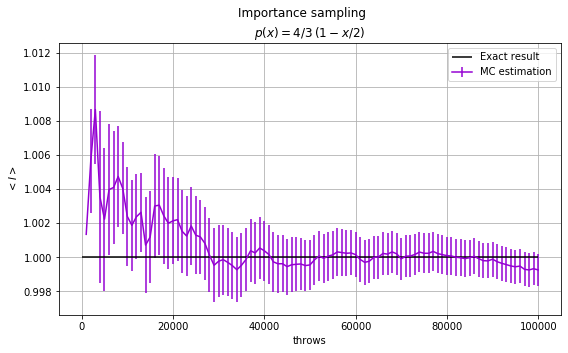

In [5]:
#plot of the importance sampled integrations
plt.figure(figsize=(9,5))
plt.suptitle('Importance sampling')

data_i= ascii.read('P1/Risultati/int.impsam',format='no_header')   #loading data
x_i = data_i['col1']
I_i = data_i['col2']
err_i = data_i['col3']

plt.title('$p(x)= 4/3 \, (1- x/2)$')
plt.grid(True)
plt.errorbar(x_i, I_i, err_i, color='darkviolet', label='MC estimation')
plt.hlines(1, 0, 1E5, label='Exact result')
plt.xlabel('throws')
plt.ylabel('$<I>$')
plt.legend()
plt.show()

In both of these cases, the evaluation of  $<I>$  is in accord with the analytically obtained result of $1$.  
The difference we expect with these cases is that the error must be lower with the *importance sampling* method.  
We can compare them here:

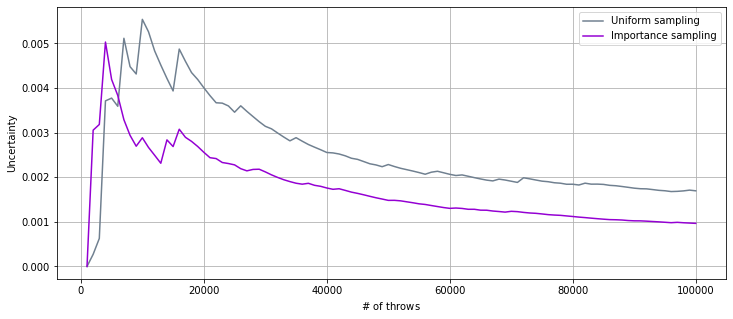

In [6]:
#Comparison between the errors in the two cases

plt.figure(figsize=(12,5))

plt.plot(x_u,err_u, label='Uniform sampling', color= 'slategrey')
plt.plot(x_i,err_i, label='Importance sampling', color='darkviolet')
plt.xlabel('$\#$ of throws')
plt.ylabel('Uncertainty')
plt.grid(True)
plt.legend()
plt.show()
#: we observe that in the importance sampling the error is lower, as we expected

### <font color="blue"> Part 02

In this exercise we have to simulate a 3D Random Walk in two cases:
1. On a discrete lattice of step *a*;
2. In the continuum, with a 'jump' *a*;  
  
I set the number of times $N_{rw}=10^4$ I made the simulation and the number of step $N_{st}=100$ in each walk. 

1. 
Starting from the origin, I generate a number between 1 and 6, then I took the integer part of it and perform the modulus operation ($x\%6$) and I associated each of the 6 possible results with a step along $x,y,z$ forward or backward.  

After $N_{st}$ I calculate the distance from the origin $\vert \overrightarrow{r} \vert^2$ and then the mean and the uncertainties with the blocking method (with $N_{blocks}=100$), to obtain the requested $ \sqrt{\langle\vert \overrightarrow{r}\vert\rangle}$.  

Fit f(N)= k*sqrt{N} 
Optimized k is k= [0.99963615]



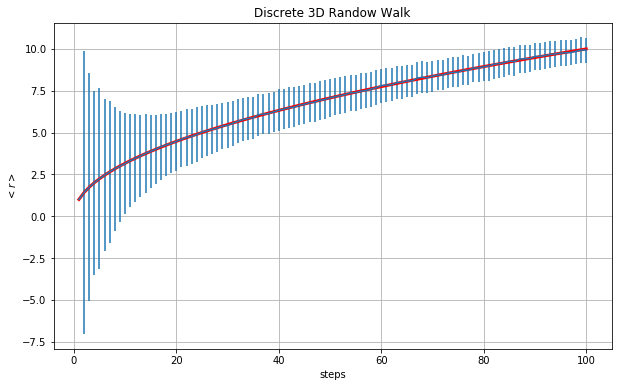

In [7]:
#discrete random walk

data= ascii.read('P2/Risultati/RW.discr')   #loading data
datab= ascii.read('P2/Risultati/RWb.discr')   #loading data
k = data['col1']
r = data['col2']
err_r = datab['col3']

plt.figure(figsize=(10,6))   #plotting data
plt.grid(True)
plt.errorbar(k, r, err_r)
plt.title('Discrete 3D Randow Walk')
plt.xlabel('steps')
plt.ylabel('$<r>$')

#fit
def f (x,K):
    return K* np.sqrt(x)   #function of fit (parameter k)

k_ott, k_err = curve_fit(f, k, r)   #optimization
y_fit = f(k,k_ott)
plt.plot(k, y_fit, linewidth=3, color='red', label='Fit')   #plotting the fit

print(r'Fit f(N)= k*sqrt{N} ')
print("Optimized k is k=", k_ott)
print()

plt.show()

2.  I extract uniformly two angles in the space, $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$, and then perform a jump in the corresponding direction.  
The new position is
$$ \left\lbrace\begin{aligned}
    x&=a\sin\theta\cos\phi \\
    y&=a\sin\theta\sin\phi \\
    z&=a\cos\phi
\end{aligned}\right. .$$  
I choose $a=1$ and the results:

Fit f(N)= k*sqrt{N} 
Optimized k is k= [0.99515656]



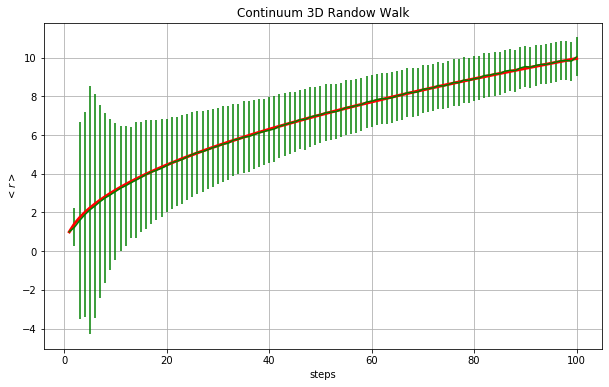

In [8]:
#continuum random walk

datac= ascii.read('P2/Risultati/RW.cont')   #loading data
datacb= ascii.read('P2/Risultati/RWb.cont')   #loading data
kc = datac['col1']
rc = datac['col2']
err_rcb = datacb['col3']
plt.figure(figsize=(10,6))   #plotting data
plt.grid(True)
plt.errorbar(kc, rc, err_rcb, color = 'green')
plt.title('Continuum 3D Randow Walk')
plt.xlabel('steps')
plt.ylabel('$<r>$')

kc_ott, kc_err = curve_fit(f, kc, rc)   #fit parameter optimization
yc_fit = f(kc,kc_ott)
plt.plot(kc, yc_fit, linewidth=3, color='red', label='Fit')
print(r'Fit f(N)= k*sqrt{N} ')
print("Optimized k is k=", kc_ott)
print()

plt.show()

In both cases, I fitted the curve with a function $f(N)= k \sqrt N$: the fit seems very effective and the costant $k$ is very close to 1.  
I tried to perform Random Walks with different $a$ and the result is that always $k \sim a$.  
This kind of fit is a confirmation of the diffusive behavior, typical of this kind of processes, as we discussed in the theory lesson.